In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
%load_ext autoreload
%autoreload 2

In [1]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [2]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [3]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    return np.sum(np.power(y - tx@w,2))
    


# 2 Grid Search

Fill in the function `grid_search()` below:

In [4]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            losses[i][j] =compute_loss(y,tx,np.array([w0[i],w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=848489.6629356495, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.018 seconds


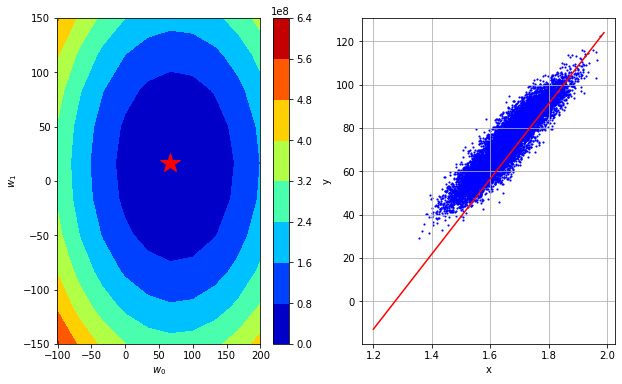

In [5]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [95]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    error = y - tx@w.T
    return (-1/len(y)) * tx.T@error

Please fill in the functions `gradient_descent` below:

In [96]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
          
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [97]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1159413.3862724844, w0=51.847464098448434, w1=7.724426406192428
Gradient Descent(1/49): loss=128585.97837944483, w0=67.40170332798299, w1=10.041754328050118
Gradient Descent(2/49): loss=35811.51166907113, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=27461.8096651375, w0=73.46785662750146, w1=10.945512217574596
Gradient Descent(4/49): loss=26710.33648478348, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=26642.70389855162, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(6/49): loss=26636.61696579075, w0=74.0516072257859, w1=11.03248153448191
Gradient Descent(7/49): loss=26636.06914184228, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(8/49): loss=26636.019837686912, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=26636.01540031292, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(10/49): loss=26636.015000949268, w0=74.06767464603033, w1=11.034

In [98]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [108]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    error = y - tx@w.T
    return (-1/len(y)) * tx.T@error


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    reduced_y= np.random.choice(y, size=batch_size, replace=False)
    indices = [x for x in range(0,len(y))]
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        random.shuffle(indices)
        batch = indices[:batch_size]
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        reduced_y= np.take(y,batch,axis=0)
        reduced_tx = np.take(tx,batch,axis=0)
        loss = compute_loss(reduced_y,reduced_tx,w)
        gradient = compute_gradient(reduced_y,reduced_tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
          
        # store w and loss
        ws.append(w)
        losses.append(loss)

    return losses, ws

In [109]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.5
batch_size = 3

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.008 seconds


In [110]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [91]:
def compute_loss_MAE(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    return np.sum(np.absolute(y - tx@w))
    

In [92]:
def compute_subgradient(y,tx,w):
    error = y - tx@w.T
    if 0 in error :
        print(error)
    return -(1/len(y))*tx.T@np.sign(y - tx@w.T)

In [93]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss_MAE(y,tx,w)
        gradient = compute_subgradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
          
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [94]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 4

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=14961.696782695128, w0=4.000000000000003, w1=4.135580766728708e-15
Gradient Descent(1/49): loss=14153.69678269513, w0=8.000000000000005, w1=8.271161533457416e-15
Gradient Descent(2/49): loss=13345.696782695128, w0=12.000000000000007, w1=1.2406742300186124e-14
Gradient Descent(3/49): loss=12537.696782695126, w0=16.00000000000001, w1=1.6542323066914832e-14
Gradient Descent(4/49): loss=11729.696782695126, w0=20.000000000000014, w1=2.067790383364354e-14
Gradient Descent(5/49): loss=10921.696782695126, w0=24.000000000000018, w1=2.481348460037225e-14
Gradient Descent(6/49): loss=10113.696782695126, w0=28.00000000000002, w1=2.8949065367100957e-14
Gradient Descent(7/49): loss=9305.696782695126, w0=32.00000000000002, w1=3.3084646133829665e-14
Gradient Descent(8/49): loss=8497.696782695126, w0=36.00000000000002, w1=3.722022690055837e-14
Gradient Descent(9/49): loss=7689.696782695124, w0=40.00000000000002, w1=4.135580766728708e-14
Gradient Descent(10/49): loss=6881.69

In [90]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [104]:
def compute_stoch_gradient_MAE(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    error = y - tx@w.T
    if 0 in error :
        print(error)
    return -(1/len(y))*tx.T@np.sign(y - tx@w.T)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    reduced_y= np.random.choice(y, size=batch_size, replace=False)
    indices = [x for x in range(0,len(y))]
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        random.shuffle(indices)
        batch = indices[:batch_size]
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        reduced_y= np.take(y,batch,axis=0)
        reduced_tx = np.take(tx,batch,axis=0)
        loss = compute_loss(reduced_y,reduced_tx,w)
        gradient = compute_gradient(reduced_y,reduced_tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
          
        # store w and loss
        ws.append(w)
        losses.append(loss)

    return losses, ws

In [105]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.5
batch_size = 3

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.008 seconds


In [106]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>